In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


CARGAR DATOS 

In [3]:
df = pd.read_csv('C:/Users/ACER NITRO/Downloads/datos_clasificacion.txt', delimiter='\t')

EXPLORACION INICIAL DE LOS DATOS

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374 entries, 0 to 11373
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Edad                  11374 non-null  int64 
 1   Ingresos              11374 non-null  int64 
 2   Gastos                11374 non-null  int64 
 3   Balance_Deuda         11374 non-null  int64 
 4   Puntaje_Credito       11374 non-null  int64 
 5   Numero_Productos      11374 non-null  int64 
 6   Historial_Incidentes  11374 non-null  int64 
 7   Región                11374 non-null  object
 8   Tipo_Empresa          11374 non-null  object
 9   Sector                11374 non-null  object
 10  Estado_Financiero     11374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 977.6+ KB
None
               Edad       Ingresos        Gastos  Balance_Deuda  \
count  11374.000000   11374.000000  11374.000000   11374.000000   
mean      43.488043  109356.763935  52401.407948  

DEFINIR VARIABLES NUMERICAS Y CATEGORICAS

In [5]:
numerical_features = ['Edad', 'Ingresos', 'Gastos', 'Balance_Deuda', 'Puntaje_Credito', 'Numero_Productos', 'Historial_Incidentes']
categorical_features = ['Región', 'Tipo_Empresa', 'Sector']

VISUALIZACION DE LA DISTRIBUCION DE VARIABLES NUMERICAS

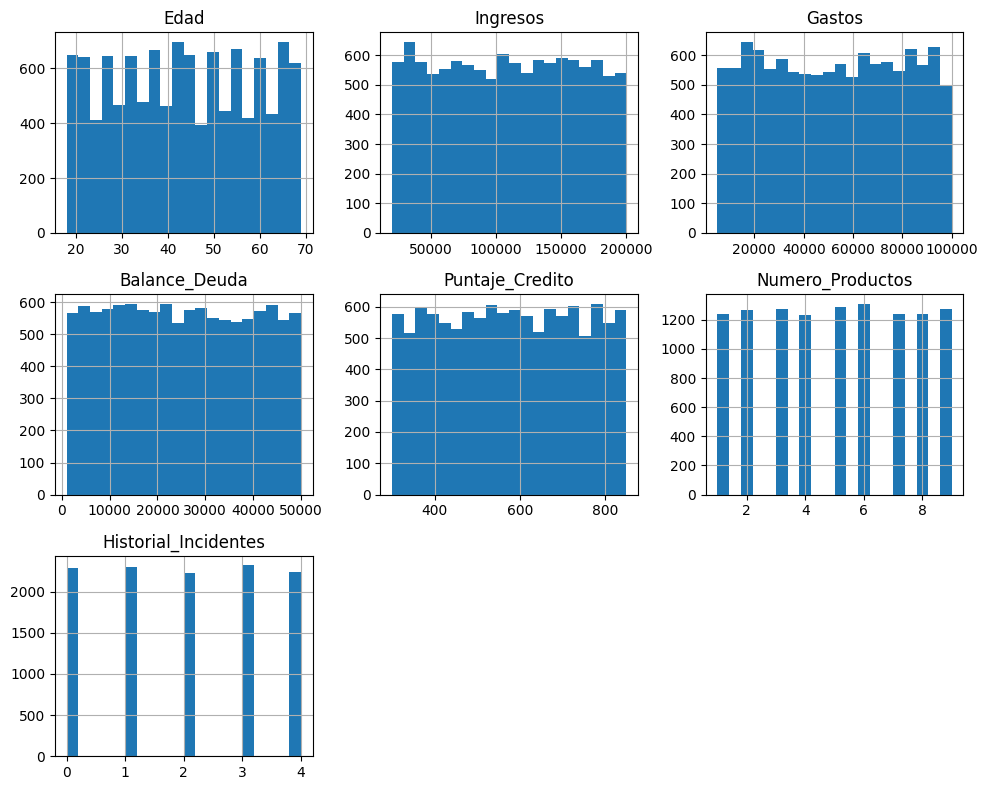

In [20]:
df[numerical_features].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

VISUALIZACIOND DE LAS VARIABLES CATEGORICAS

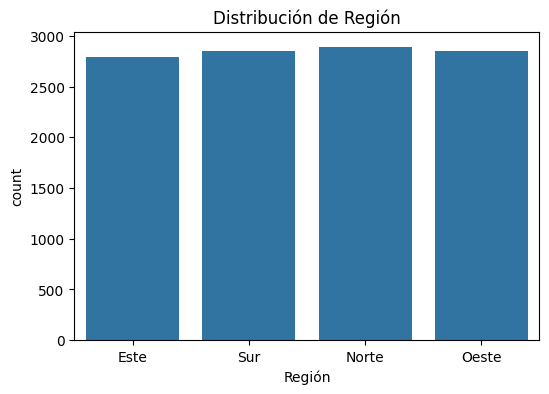

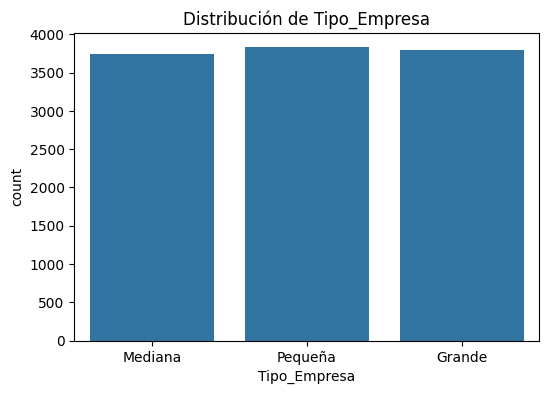

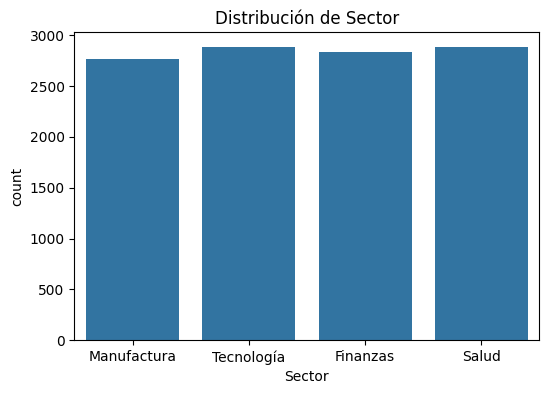

In [21]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.show()

DETECCION Y TRATAMIENTO DE LOS VALORES FLOTANTES

In [22]:
print(df.isnull().sum())
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

Edad                    0
Ingresos                0
Gastos                  0
Balance_Deuda           0
Puntaje_Credito         0
Numero_Productos        0
Historial_Incidentes    0
Región                  0
Tipo_Empresa            0
Sector                  0
Estado_Financiero       0
dtype: int64


DETECCION Y TRATAMIENTO DE VALORES ATIPICOS 

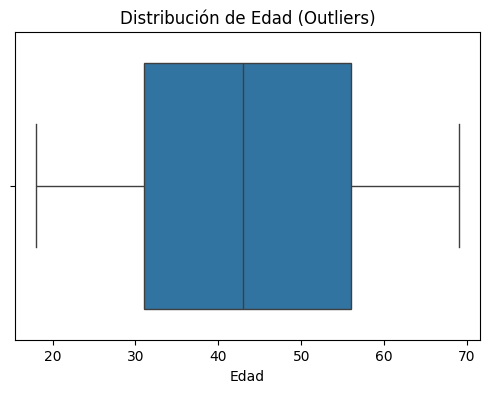

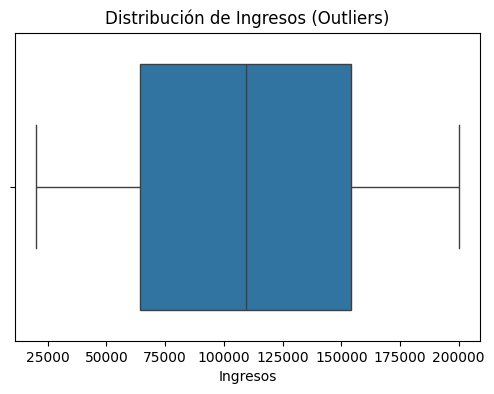

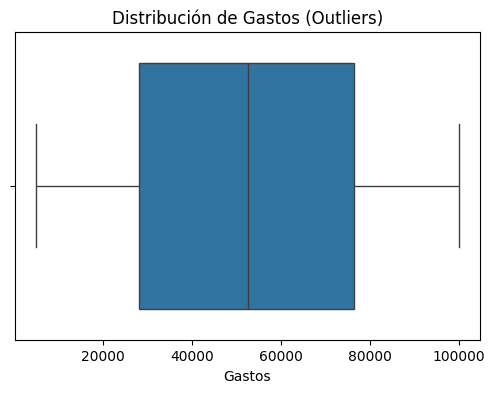

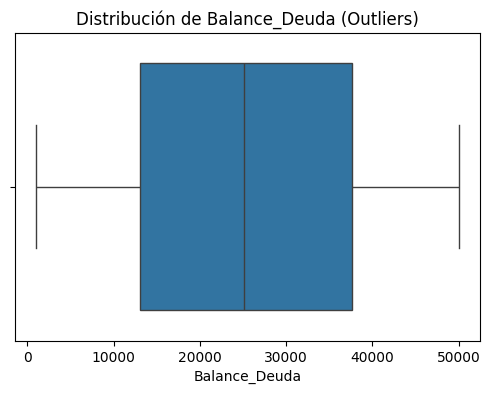

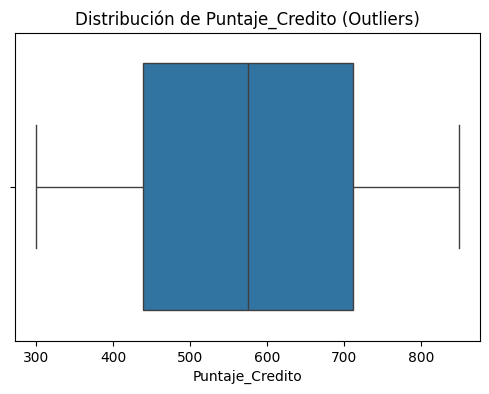

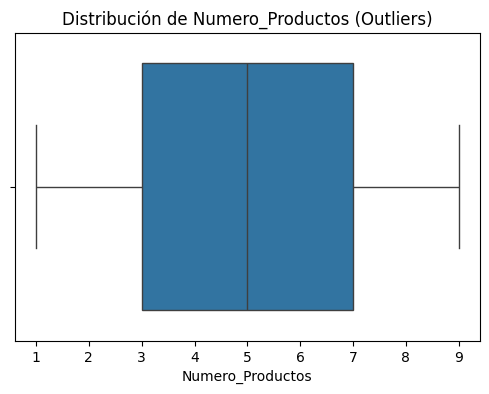

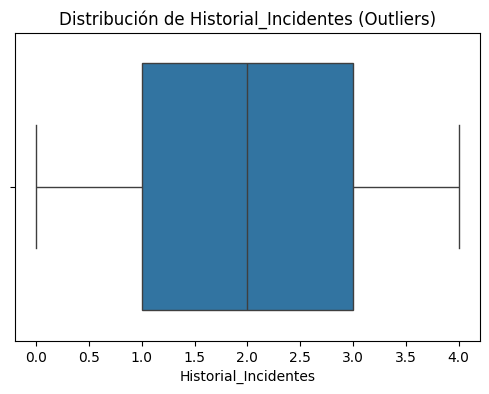

In [23]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col} (Outliers)')
    plt.show()

ELIMINAR VALORES ATIPICOS QUE ESTEN MAS ALLA DE 3 DESVIACIONES ESTANDAR

In [24]:
for col in numerical_features:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]

print("Datos luego de eliminar outliers:\n", df.describe())

Datos luego de eliminar outliers:
                Edad       Ingresos        Gastos  Balance_Deuda  \
count  11374.000000   11374.000000  11374.000000   11374.000000   
mean      43.488043  109356.763935  52401.407948   25309.559873   
std       14.911079   52062.990058  27549.300244   14147.551508   
min       18.000000   20005.000000   5014.000000    1001.000000   
25%       31.000000   64221.250000  28109.000000   13061.250000   
50%       43.000000  109531.000000  52681.000000   25125.500000   
75%       56.000000  154326.000000  76493.750000   37612.000000   
max       69.000000  199992.000000  99994.000000   49995.000000   

       Puntaje_Credito  Numero_Productos  Historial_Incidentes  \
count     11374.000000      11374.000000          11374.000000   
mean        575.590997          5.008177              1.993054   
std         158.294336          2.575002              1.413108   
min         300.000000          1.000000              0.000000   
25%         439.000000         

VARIABLE OBJETIVO

In [37]:
y = df['Estado_Financiero']
X = df.drop('Estado_Financiero', axis=1)

PREPORCESAMIENTO.ESTANDARIZACION DE CARIABLES NUMERICAS Y CREACION DE VARIABLES DUMMY PARA CATEGORICAS

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

REDUCCION DE DIMENSIONALIDAD CON PCA

In [8]:
pca = PCA(n_components=0.95)

MODELOS DE CLASIFICACION

In [38]:
logreg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()

PIPELINE PARA EL PROCESAMIENTO,PCA Y LOS MODELO

In [39]:
pipe_logreg = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('classifier', logreg)])
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('classifier', rf)])
pipe_dt = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('classifier', dt)])
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('classifier', svm)])
pipe_knn = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('classifier', knn)])


DIVIDIR LOS DATOS EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ENTRENAMIENTO DE LOS DATOS

In [41]:
pipe_logreg.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Edad', 'Ingresos', 'Gastos',
                                                   'Balance_Deuda',
                                                   'Puntaje_Credito',
                                                   'Numero_Productos',
                                                   'Historial_Incidentes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Región', 'Tipo_Empresa',
                                                   'Sector'])])),
                ('pca', PCA(n_components=0.95)),
                ('classifier', RandomForestClassifier())])

PREDICCIONES Y EVALUACIONES

In [13]:
y_pred_logreg = pipe_logreg.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)


OPTIMIZACION DE HIPERPARAMETROS

In [42]:
# Grid de búsqueda para Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5],
}
grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Mejores hiperparámetros para Random Forest: ", grid_search_rf.best_params_)

# Grid de búsqueda para Árbol de Decisión
param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
}
grid_search_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
print("Mejores hiperparámetros para Árbol de Decisión: ", grid_search_dt.best_params_)

# Grid de búsqueda para SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
}
grid_search_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
print("Mejores hiperparámetros para SVM: ", grid_search_svm.best_params_)

# Grid de búsqueda para K-Vecinos
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 10],
    'classifier__weights': ['uniform', 'distance'],
}
grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Mejores hiperparámetros para K-Vecinos: ", grid_search_knn.best_params_)

Mejores hiperparámetros para Random Forest:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Mejores hiperparámetros para Árbol de Decisión:  {'classifier__max_depth': 15, 'classifier__min_samples_split': 2}
Mejores hiperparámetros para SVM:  {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Mejores hiperparámetros para K-Vecinos:  {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}


EVALUACION DEL MEJOR MODELO

In [43]:
# Evaluar el rendimiento del mejor modelo para Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Optimized Random Forest Report:\n", classification_report(y_test, y_pred_best_rf))
print("Optimized Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

Optimized Random Forest Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51      1142
           1       0.50      0.49      0.50      1133

    accuracy                           0.50      2275
   macro avg       0.50      0.50      0.50      2275
weighted avg       0.50      0.50      0.50      2275

Optimized Random Forest Confusion Matrix:
 [[585 557]
 [577 556]]


In [44]:
# Evaluar el rendimiento del mejor modelo para Árbol de Decisión
best_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print("Optimized Decision Tree Report:\n", classification_report(y_test, y_pred_best_dt))
print("Optimized Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dt))

Optimized Decision Tree Report:
               precision    recall  f1-score   support

           0       0.50      0.66      0.57      1142
           1       0.50      0.34      0.41      1133

    accuracy                           0.50      2275
   macro avg       0.50      0.50      0.49      2275
weighted avg       0.50      0.50      0.49      2275

Optimized Decision Tree Confusion Matrix:
 [[753 389]
 [745 388]]


In [45]:
# Evaluar el rendimiento del mejor modelo para SVM
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
print("Optimized SVM Report:\n", classification_report(y_test, y_pred_best_svm))
print("Optimized SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_svm))

Optimized SVM Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49      1142
           1       0.50      0.51      0.51      1133

    accuracy                           0.50      2275
   macro avg       0.50      0.50      0.50      2275
weighted avg       0.50      0.50      0.50      2275

Optimized SVM Confusion Matrix:
 [[553 589]
 [551 582]]


In [48]:
# Evaluar el rendimiento del mejor modelo para K-Vecinos
best_knn = grid_search_knn.best_estimator_  # Obtener el mejor modelo
y_pred_best_knn = best_knn.predict(X_test)  # Predecir sobre el conjunto de prueba
print("Optimized K-Neighbors Report:\n", classification_report(y_test, y_pred_best_knn))
print("Optimized K-Neighbors Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_knn))


Optimized K-Neighbors Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49      1142
           1       0.49      0.50      0.50      1133

    accuracy                           0.49      2275
   macro avg       0.49      0.49      0.49      2275
weighted avg       0.49      0.49      0.49      2275

Optimized K-Neighbors Confusion Matrix:
 [[548 594]
 [562 571]]
